# Inspect Spike Trains figures

For manual inspection / presentation of spike trains

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

n_timesteps = 15000
n_spikes_per_timestep = 5

spiketrain_files = glob.glob("spiketrains/*.npy")
spiketrains = []
for i in range(len(spiketrain_files)):
    spiketrain = np.load(spiketrain_files[i])
    spiketrain = spiketrain.reshape(n_timesteps, -1, n_spikes_per_timestep)
    spiketrains.append((spiketrain, spiketrain_files[i]))

STL-S
STL-V
latency


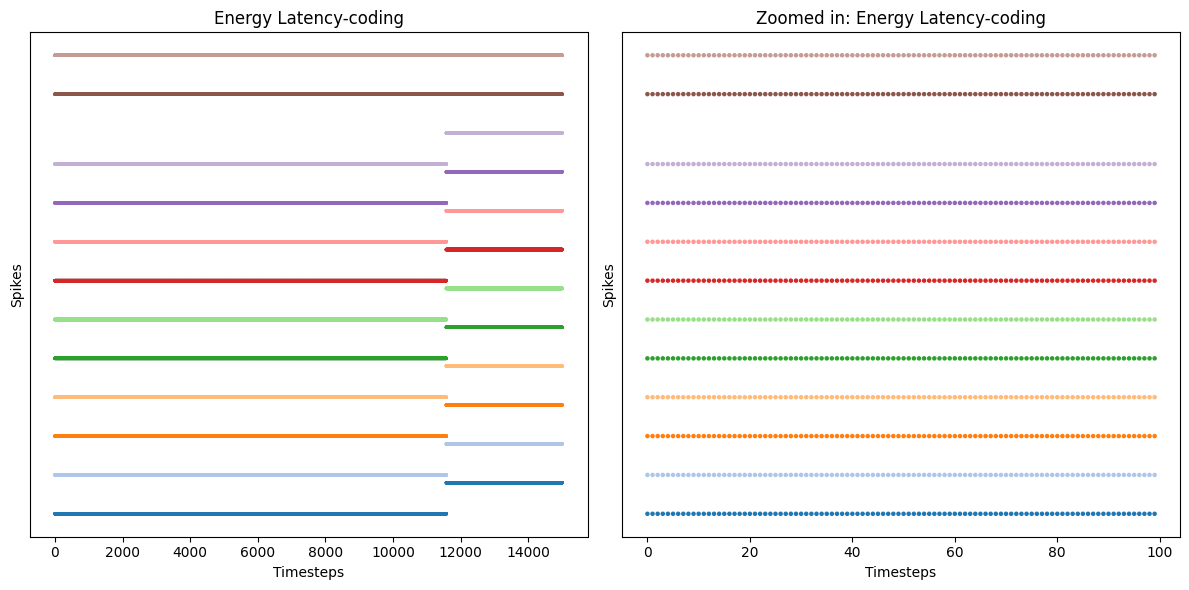

latency
STL-S
rate
rate


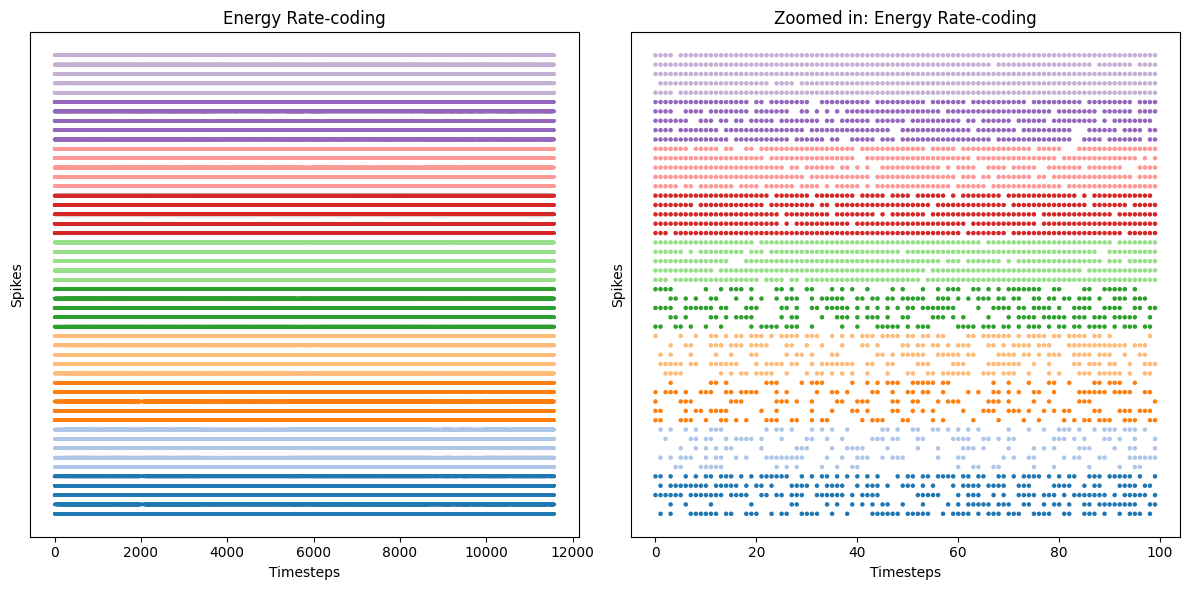

latency
STL-V
STL-S


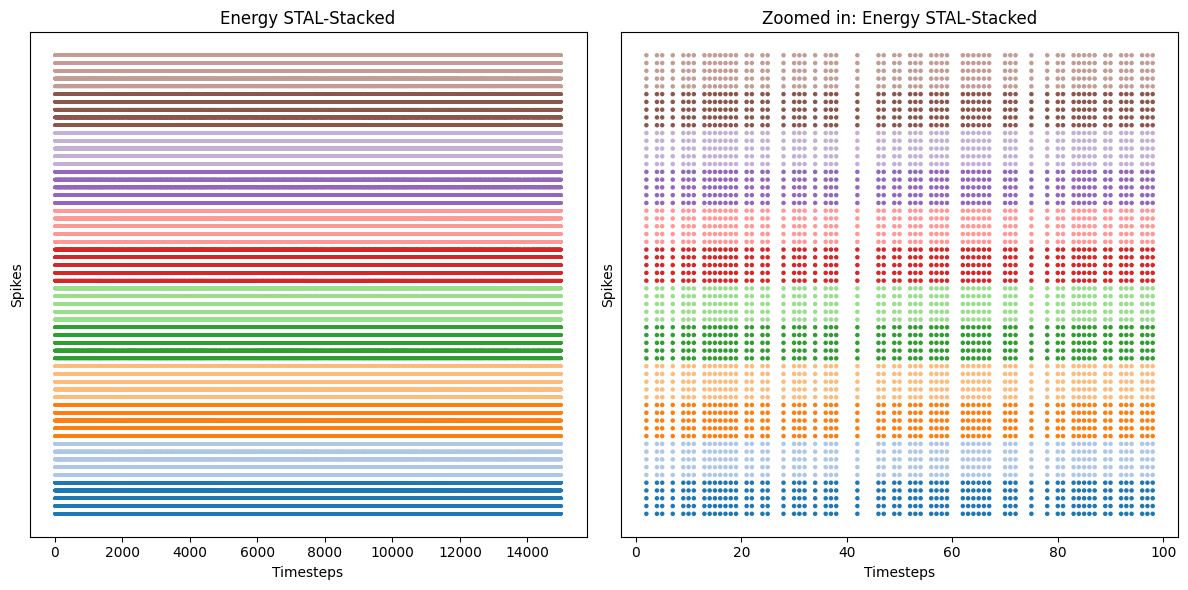

rate
STL-V


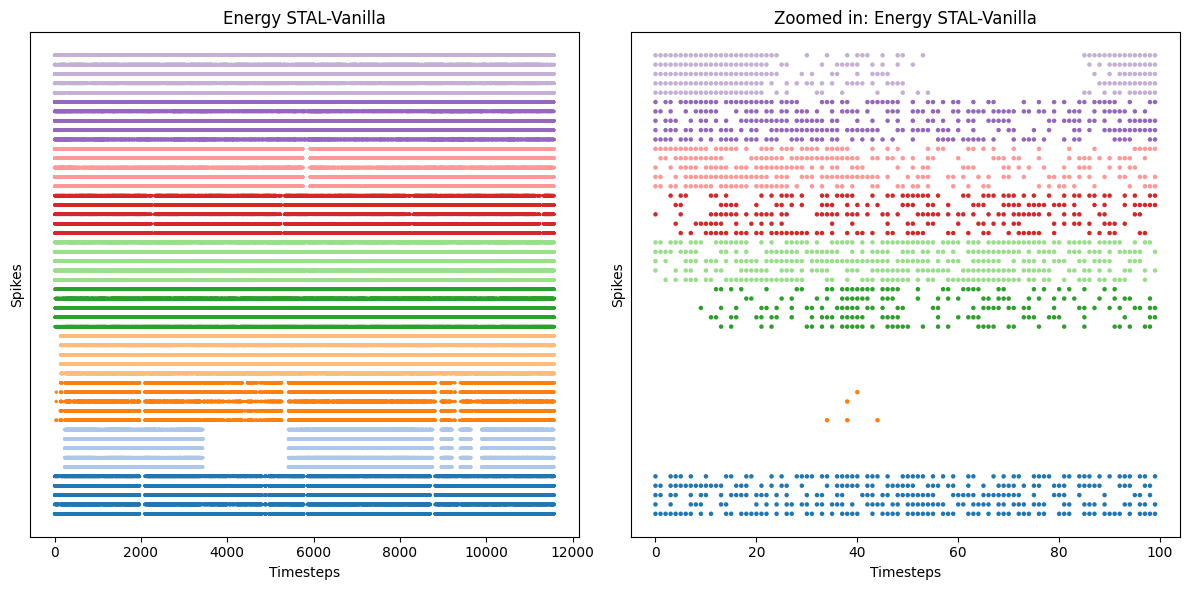

In [44]:
encoders = {"STL-S": "STAL-Stacked", "STL-V": "STAL-Vanilla", "rate": "Rate-coding", "latency": "Latency-coding"}
for spiketrain, filename in spiketrains:
    filename = filename.split("/")[-1]
    filename = filename.split(".")[0]
    _, data_type, _, encoder = filename.split("_")
    print(encoder)
    if data_type != "energy":
        continue
    fig, axs = plt.subplots(1, 2, figsize=(12,6))
    cs = plt.cm.tab20.colors
    
    start = 0
    end = 100
    
    # All timesteps
    pixels, channels, spikes = np.where(spiketrain == 1)
    y_pos = 0.01 * spikes + n_spikes_per_timestep * 0.01 * channels
    colors = np.array(cs)[channels]
    axs[0].scatter(pixels, y_pos, color=colors, marker='o', s=2)
    axs[0].set_title(data_type.capitalize() + " " + encoders[encoder])
    axs[0].set_xlabel("Timesteps")
    axs[0].set_ylabel("Spikes")
    axs[0].set_yticks([])
    
    # Zoom in of timesteps
    zoom = np.arange(start, end)
    zoom_spiketrain = spiketrain[zoom]
    pixels, channels, spikes = np.where(zoom_spiketrain == 1)
    y_pos = 1 + 0.01 * spikes + n_spikes_per_timestep * 0.01 * channels
    colors = np.array(cs)[channels]
    axs[1].scatter(pixels, y_pos, color=colors, marker='o', s=5)
    axs[1].set_title("Zoomed in: " + data_type.capitalize() + " " + encoders[encoder])
    axs[1].set_xlabel("Timesteps")
    axs[1].set_ylabel("Spikes")
    axs[1].set_yticks([])
    
    plt.tight_layout()
    plt.show()